<h3> Name: Subhrojyoti Narayan Roy</h3>

<h3> Emp_id : 11546</h3>

<h1>HR Analytics</h1>

<h2>Dataset Description:</h2>


| Variable | Definition | 
| :- | :- | 
| **employee_id** | Unique ID for employee 
| **department** | Department of employee 
| **region** | Region of employment (unordered) 
| **education** | Education Level 
| **gender** | Gender of Employee 
| **recruitment_channel** | Channel of recruitment for employee
| **no_of_trainings** | no. of other trainings completed in previous year on soft skills, technical skills etc. 
| **age** | Age of Employee 
| **previous_year_rating** | Employee Rating for the previous year
| **length_of_service** | Length of service in years
| **KPIs_met >80%** | if Percent of KPIs(Key performance Indicators) >80% then 1 else 0 
| **awards_won?** | if awards won during previous year then 1 else 0
| **avg_training_score** | Average score in current training evaluations 
| **is_promoted** | (Target) Recommended for promotion 




### Job :
The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

# Importing Libraries

In [1]:
#imoporting libraries 
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore') # Used to ignore warnings 

In [2]:
df = pd.read_csv("train_LZdllcl.csv")  #reading train dataset
df_test = pd.read_csv("test_2umaH9m.csv") #reading test dataset

  # Preprocessing

In [3]:
print("Shape of Train Data: "+str(df.shape)+"\nShape of Test Data: "+str(df_test.shape))

Shape of Train Data: (54808, 14)
Shape of Test Data: (23490, 13)


In [4]:
df.info()  # To gain basic knowledge(Overview) of the types of variables and also the number of non-null values in each column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
df.describe()   # To gain statistical insights of the numerical data  present in the dataset 

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
df.head()  # to see the first five rows of the dataset 

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [7]:
# To check distinct values for different attributes
# We are using the unique method here to get only the unique elements in each variable. 
print("Department:\n{0}\n\nRegion:\n{1}\n\nEducation:\n{2}\n\nGender:\n{3}\n\nRecruitment_channel:\n{4}\n\nno_of_trainings:\n{5}\n\nAge:\n{6}\n\nprevious_year_rating:\n{7}\n\nlength_of_service:\n{8}\n\nKPIs_met >80%:\n{9}\n\nawards_won?:\n{10}\n\navg_training_score:\n{11}".format(df["department"].unique(),sorted(df["region"].unique()),df["education"].unique(),df["gender"].unique(),df["recruitment_channel"].unique(),sorted(df["no_of_trainings"].unique()),sorted(df["age"].unique()),sorted(df["previous_year_rating"].unique()),sorted(df["length_of_service"].unique()),df["KPIs_met >80%"].unique(),df["awards_won?"].unique(),sorted(df["avg_training_score"].unique()))); 

Department:
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']

Region:
['region_1', 'region_10', 'region_11', 'region_12', 'region_13', 'region_14', 'region_15', 'region_16', 'region_17', 'region_18', 'region_19', 'region_2', 'region_20', 'region_21', 'region_22', 'region_23', 'region_24', 'region_25', 'region_26', 'region_27', 'region_28', 'region_29', 'region_3', 'region_30', 'region_31', 'region_32', 'region_33', 'region_34', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8', 'region_9']

Education:
["Master's & above" "Bachelor's" nan 'Below Secondary']

Gender:
['f' 'm']

Recruitment_channel:
['sourcing' 'other' 'referred']

no_of_trainings:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Age:
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]

previous_year_rating:
[1.0, 2.0, 3.0, 4.0, 5.0, nan]

length_of_service:
[1, 2

### Observation
Region column is a  mixed variable.
We can seperate the values from the string, as all numeric values have the prefix 'region_' added to it we can remove it and convert it to int.

In [8]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [9]:
df.isnull().mean()*100  # to visualise the percentage of missing values for each variable

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [10]:
df.isnull().sum() #Number of Missing values in each Columns

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

### Observation
It can be seen that there are 2409 null values in the education column and 4124 null values in the previous_year_rating column
accounting for 4.39 and 7.52 percent of their respective columns.
Missing data in previous_year_rating column may be due to the reason that these particular employees haven't yet completed their first year in the company.
Missig data in the education column may be a case of MCAR.(Missing data Completely at Random)

In [11]:
pd.set_option('display.max_columns', df.shape[1]+1)  #to view all the columns

### Splitting the data

In [12]:
#Splitting data into feature set and Target 
X = df.iloc[: , :13]   #feature set
Y = df['is_promoted']  # Target Column 
X.head()
print(X.shape)
print(Y.shape)

(54808, 13)
(54808,)


In [13]:
# TRAIN TEST SPLIIITNG (Doing it at the beginning to avoid the risk of output leakage)
from sklearn.model_selection import train_test_split
X_train, X_test_initially ,Y_train, Y_test_initially= train_test_split(X, Y,test_size=.30,shuffle=True,random_state=42)
X_train.shape,X_test_initially.shape,Y_train.shape,Y_test_initially.shape

((38365, 13), (16443, 13), (38365,), (16443,))

In [14]:
# Creating the validation set and the actual test set from the train data
X_val, X_test, Y_val, Y_test = train_test_split(X_test_initially, Y_test_initially, test_size=0.25, random_state=1) 
print(X_val.shape,X_test.shape)
print(Y_val.shape,Y_test.shape)
print(X_train.shape,Y_train.shape)

(12332, 13) (4111, 13)
(12332,) (4111,)
(38365, 13) (38365,)


In [15]:
 X_train.corr() # Correlation matrix for numerical variables

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,1.000000,-0.007144,0.001366,0.002577,0.002119,-0.003647,0.008870,-0.003152
no_of_trainings,-0.007144,1.000000,-0.079500,-0.064985,-0.057886,-0.047327,-0.005399,0.043935
age,0.001366,-0.079500,1.000000,0.004253,0.659962,-0.024094,-0.005250,-0.048057
previous_year_rating,0.002577,-0.064985,0.004253,1.000000,-0.004810,0.349920,0.031732,0.079347
length_of_service,0.002119,-0.057886,0.659962,-0.004810,1.000000,-0.077684,-0.039176,-0.036390
KPIs_met >80%,-0.003647,-0.047327,-0.024094,0.349920,-0.077684,1.000000,0.095167,0.078645
awards_won?,0.008870,-0.005399,-0.005250,0.031732,-0.039176,0.095167,1.000000,0.073321
avg_training_score,-0.003152,0.043935,-0.048057,0.079347,-0.036390,0.078645,0.073321,1.000000


### Observation
There is a strong positive correlation between length_of_service and age which basically reflects those employees who have been working for a long time and thus have gotten older.
There is a some positive correlation previous_year_rating and KPIs_met>80%. So, generally employees with good previous year ratings have KPIs_met>80% ==1 and vice versa.

In [16]:
# To understand the relationship between categorical variables and to find the association present among them we use Cramers_V
# Cramers_V helps us find the association between categorical variables.  
# 0 means no association and 1 means full association
from scipy.stats import chi2_contingency
import numpy as np

data= df[[i for i in df.columns if i not in ('no_of_trainings', 'age', 'previous_year_rating',  #taking all the categorical into data 
       'length_of_service','employee_id','avg_training_score','KPIs_met >80%','is_promoted','awards_won?')]]


data['department']= data['department'].astype('str')
data['region']= data['region'].astype('str')
data['education']= data['education'].astype('str')
data['gender']= data['gender'].astype('str')
data['recruitment_channel']= data['recruitment_channel'].astype('str')
 

data.head()


,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


In [17]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data.columns :
    data_encoded[i]=label.fit_transform(data[i])# label encoding all the categorical columns

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))


In [18]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V upto two decimals 
  rows.append(col)
  
cramers_results = np.array(rows)
data_matrix = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

data_matrix


,department,region,education,gender,recruitment_channel
department,1.00,0.02,0.02,0.08,0.00
region,0.02,1.00,0.03,0.03,0.01
education,0.02,0.03,1.00,0.00,0.00
gender,0.08,0.03,0.00,1.00,0.00
recruitment_channel,0.00,0.01,0.00,0.00,1.00


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt



mask = np.zeros_like(data_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(data_matrix, mask=mask,vmin=0., vmax=1, square=True)

plt.show()


<Figure size 640x480 with 2 Axes>

### Observation
As it can be seen that there is no significant association between the categotical features.

## Handling Missing values:
Since previous_year_rating is moderately correlated with KPIs_met >80%,so we group it using KPIs_met >80% and then find the mean and impute it.  
For categorical data it would be best to fill the missing values with the mode of the column.
Filling the education column with the most frequent value in that column. The null values in the column looks like a case of MCAR. 



In [20]:
#NULL IMPUTAION
X_train['previous_year_rating'] = X_train.groupby(["KPIs_met >80%"])["previous_year_rating"].apply(lambda x: x.fillna(round(x.mean())))
X_train['education'] = X_train['education'].fillna(X_train['education'].mode()[0]) 


In [21]:
# Applying on X_val, X_test & test sets
X_val['previous_year_rating'] = X_val.groupby(["KPIs_met >80%"])["previous_year_rating"].apply(lambda x: x.fillna(round(x.mean())))
X_val['education'] = X_val['education'].fillna(X_val['education'].mode()[0])

X_test['previous_year_rating'] = X_test.groupby(["KPIs_met >80%"])["previous_year_rating"].apply(lambda x: x.fillna(round(x.mean())))
X_test['education'] = X_test['education'].fillna(X_test['education'].mode()[0])

df_test['previous_year_rating'] = df_test.groupby(["KPIs_met >80%"])["previous_year_rating"].apply(lambda x: x.fillna(round(x.mean())))
df_test['education'] = df_test['education'].fillna(df_test['education'].mode()[0])

In [22]:
print("Missing values in X_train\n",X_train.isnull().sum())
print("\nMissing values in X_val\n",X_val.isnull().sum())
print("\nMissing values in X_tes\n",X_test.isnull().sum())
print("\nMissing values in test\n",df_test.isnull().sum())

Missing values in X_train
 employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

Missing values in X_val
 employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

Missing values in X_tes
 employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_ye

### Observation
No missing value left.

In [23]:
# Duplicate column removal
def getDuplicateColumns(df):
    dup_col = set()
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            otherCol = df.iloc[:, y]
            if col.equals(otherCol):
                dup_col.add(df.columns.values[y])
 
    return list(dup_col)


dup_col = getDuplicateColumns(X_train)

In [24]:
print(dup_col) # No duplicate columns present 

[]


In [25]:
# CONSTANT FEATURE REMOVAL
X_train_const = X_train.drop( ['department','region','education','gender','recruitment_channel'], axis= 1)
from sklearn.feature_selection import VarianceThreshold
# TO REMOVE CONSTANT FEATURES
sel = VarianceThreshold(threshold=0)
sel.fit(X_train_const)  # fit finds the features with zero variance
# if we sum over get_support, we get the number of features that are not constant
print(sum(sel.get_support()))
print(sel.get_support())

8
[ True  True  True  True  True  True  True  True]


Constant features need to be removed as they don't provide any useful information form which the model can learn. This can be done using the Variance threshold. We put the threshold value as 0. The indicates that all values within a set of numbers are identical/same.

In [26]:
#No Quasi-constant features present

In [27]:
#TO REMOVE QUASI-CONSTANT FEATURES
sel = VarianceThreshold(
    threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train_const)  # fit finds the features with low variance
sum(sel.get_support())
print(sel.get_support())

[ True  True  True  True  True  True  True  True]


In [28]:
# No Quasi-constant features present

 Quasi-Constant features need to be removed as they don't provide any useful information form which the model can learn.For removing Quasi-constant features instead of passing 0 as the value for the threshold parameter, we will pass 0.01, which means that it will remove those column where approximately 99% of the values are similar.

# EDA

In [29]:
# Importing libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
X_train_copy = X_train.copy()
Y_train_copy = Y_train.copy()    # Creating a copy and using that copy for the EDA part so as to avoid any data leakage

In [31]:
print(X_train_copy is X_train)
#Signifying that both of these dataframes refer to different memory locations


False


In [32]:
#print(X_train_copy == X_train) #Just to check again

In [33]:
# All the operations for EDA would be done on the below dataframe.
df_col_merged = pd.concat([X_train_copy, Y_train_copy], axis=1,sort =True)  # Merging these two dataframes so it will be helpful for us in EDA

In [34]:
df_col_merged.shape

(38365, 14)

## 1. Univariate Analysis

In [35]:
df_col_merged.describe() # To do a basic Univariate analysis of the features

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,38365.000000,38365.000000,38365.000000,38365.000000,38365.00000,38365.000000,38365.000000,38365.000000,38365.000000
mean,39255.217933,1.256093,34.792154,3.331709,5.86790,0.353656,0.023433,63.370364,0.086928
std,22592.210270,0.613614,7.684278,1.218457,4.26744,0.478110,0.151276,13.346021,0.281733
min,2.000000,1.000000,20.000000,1.000000,1.00000,0.000000,0.000000,39.000000,0.000000
25%,19681.000000,1.000000,29.000000,3.000000,3.00000,0.000000,0.000000,51.000000,0.000000
50%,39276.000000,1.000000,33.000000,3.000000,5.00000,0.000000,0.000000,60.000000,0.000000
75%,58815.000000,1.000000,39.000000,4.000000,7.00000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.00000,1.000000,1.000000,99.000000,1.000000


In [36]:
#To understand  the distributions
# We can plot Q-Q plots to visualise if the variable is normally distributed.
# If the variable is normally distributed, we should see a 45 degree straight line of the values over the theoretical quantiles
# We want normal distributions because linear machine learning models assume that the variables are normally distributed.
# Although Tree based models don't have this assumption
# ML models generally learn better when they are provided with feautures having normal distribution.
import scipy.stats as stats
import pylab

def diagnostic_plots(train, variable):
 
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    sns.distplot(train[variable], color = 'darkblue')

    plt.subplot(1, 2, 2)
    stats.probplot(train[variable], dist="norm", plot=pylab)

    plt.show()

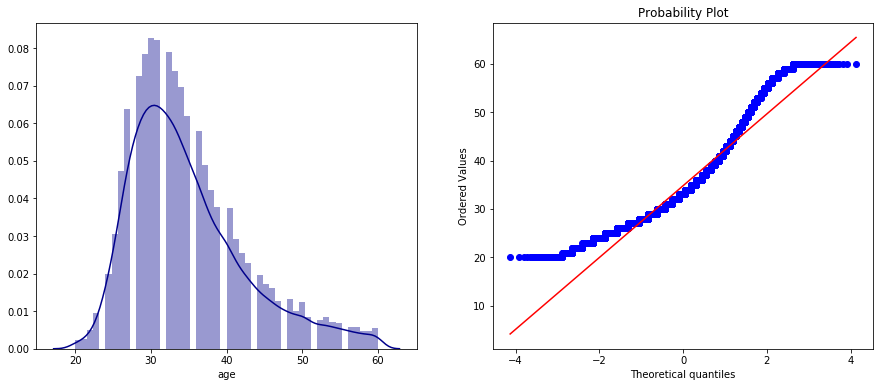

skewness of data 1.0124451301983404
Kurtosis of data 3.795184069548417


In [37]:
diagnostic_plots(df_col_merged,'age') 
from scipy.stats import skew,kurtosis
print("skewness of data",skew(df_col_merged['age']))
# If skewness is less than -1 or greater than 1, the distribution is highly skewed
print("Kurtosis of data",kurtosis(df_col_merged['age'],fisher=False))


### Observations
Mean is greater than the median. Age is highly skewed(>1) distribution here and is postively(right) skewed.
Value of kurtosis(3.80) indicate that the distribution is peaked and possess fatter tails(Leptokurtic distribution) which indicates that the distribution has more of the values are located in the tails of the distribution rather than around the mean.
Most employee are in the age range of 25 to 40 years of age. 

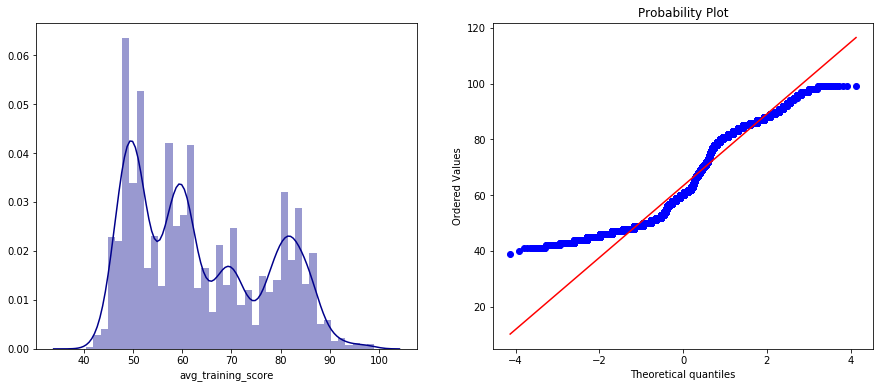

skewness of data 0.4540298507123658
Kurtosis of data 1.9599272565133192


In [38]:
diagnostic_plots(df_col_merged,'avg_training_score') 
print("skewness of data",skew(df_col_merged['avg_training_score']))
print("Kurtosis of data",kurtosis(df_col_merged['avg_training_score'],fisher = False))


### Observation
It has a multimodal distribution which means it has more than 1 peak. One way to get around it would be to bin its values.

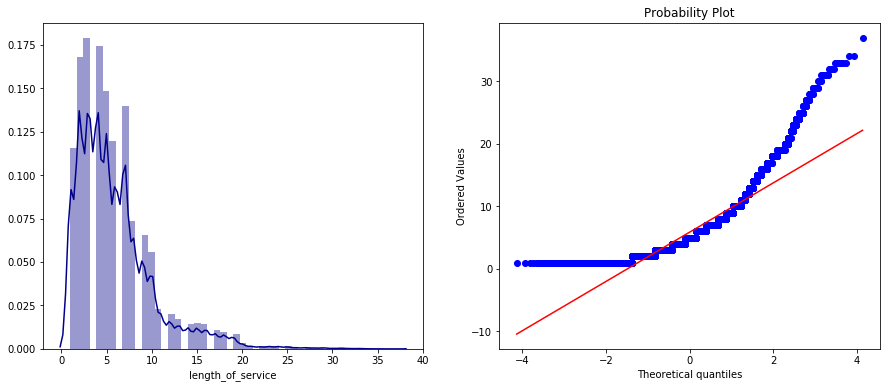

skewness of data 1.7332584619700973
Kurtosis of data 7.378431938698423


In [39]:
diagnostic_plots(df_col_merged,'length_of_service')
print("skewness of data",skew(df_col_merged['length_of_service']))
print("Kurtosis of data",kurtosis(df_col_merged['length_of_service'],fisher = False))


### Observations
Most employee stay with the company upto 10 years.
Mean is greater than the median. length of service is highly skewed distribution here and is postively(right) skewed.
Positive values of kurtosis(7.45) indicate that the distribution is peaked and possess thick tails(Leptokurtic distribution) which indicates that the distribution has more of the values are located in the tails of the distribution rather than around the mean.

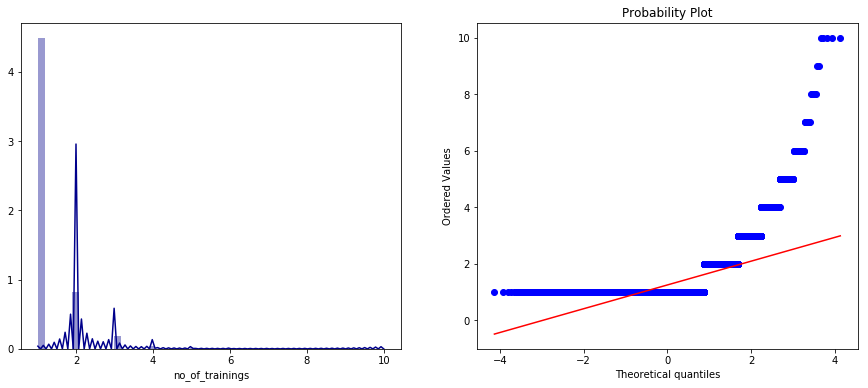

skewness of data 3.4560903889662185
Kurtosis of data 22.179001160511735


In [40]:
diagnostic_plots(df_col_merged,'no_of_trainings')
print("skewness of data",skew(df_col_merged['no_of_trainings']))
print("Kurtosis of data",kurtosis(df_col_merged['no_of_trainings'],fisher = False))



### Observations 
Value of kurtosis(22.57) shows why the distribution is so peaked and possess fatter tails(Leptokurtic distribution) which indicates that the distribution has more of the values are located in the tails of the distribution rather than around the mean. 
Most of the employees have completed atleast 1 training. 
Also there is high positive(right)skewness present. 

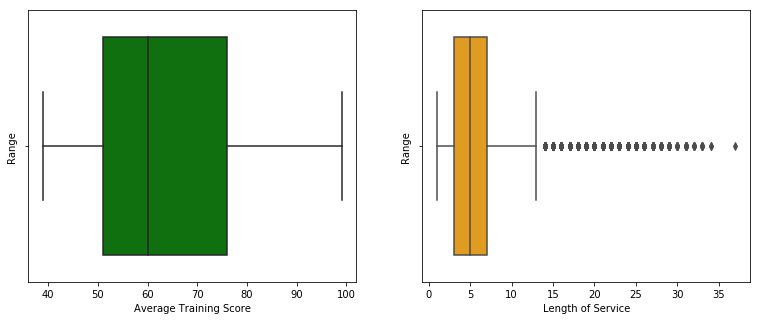

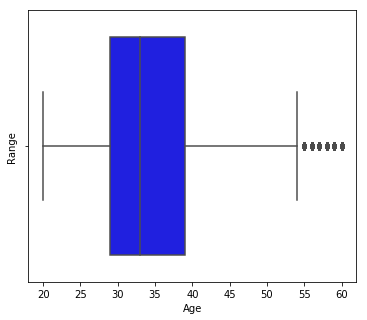

In [41]:
# Box plot for average training score
plt.rcParams['figure.figsize'] = (20, 5)
plt.subplot(1, 3, 1)
sns.boxplot(df_col_merged['avg_training_score'], color = 'green')
plt.xlabel('Average Training Score')
plt.ylabel('Range')

# Box plot for length of service
plt.subplot(1, 3, 2)
sns.boxplot(df_col_merged['length_of_service'], color = 'orange')
plt.xlabel('Length of Service')
plt.ylabel('Range')
plt.show()

# Box plot for age
plt.subplot(1, 3, 3)
sns.boxplot(df_col_merged['age'], color = 'blue')
plt.xlabel('Age')
plt.ylabel('Range')
plt.show()




### Observation
#.
Length of service is highly right skewed and has a lot of ouliers present which means there is high variance. Median is 5. Median closer to the lower or bottom quartile.We can see that 50% of employees have served the company for about 4 to 7 years.Values ranging from 14 to 37 years have been shown as outlying values for this column. 
#.
Age also has some amount of outliers present and is also right skewed. Median is around 33.We can also see that 50% of the employee working in this company are between 28 to 39 years of age. Values ranging above 54 years old have been shown as outlying values for this column.
#.
The box plot is comparatively tall. This suggests employees hold quite different average training score. It's median lies at 60. 50% of the employees has an average training score between 50 to 78.

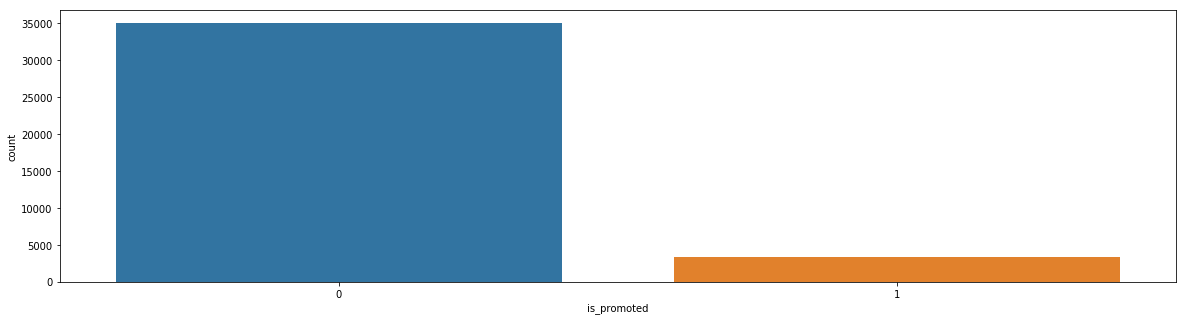

In [42]:
# Total number of people promoted and not promoted
sns.countplot(df_col_merged['is_promoted'])

### Observation
More people are not promoted(about 90%) than promoted when compared. There is an imbalance in the target of the dataset(We will deal with it later on).

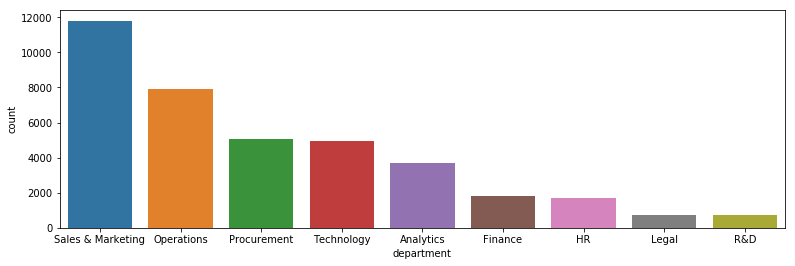

In [43]:
plt.figure(figsize=(13, 4))
sns.countplot(df_col_merged['department'], order = df_col_merged['department'].value_counts().index);


### Observation
Most employees(>11,000) work under the Sales & Marketting department, followed by operations and technology.
Employees in R&D are cosiderably lower in count than the other departments.

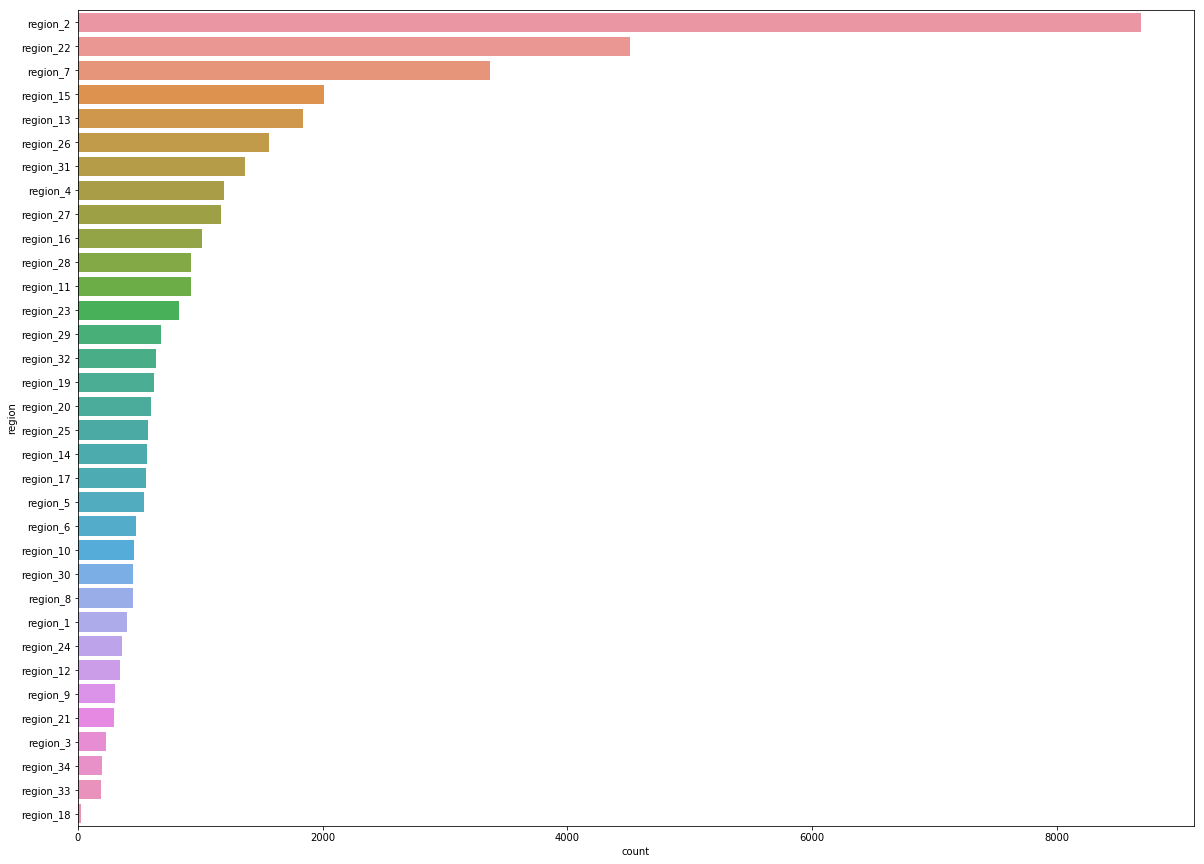

In [44]:
plt.figure(figsize=(20, 15))
sns.countplot(y =df_col_merged['region'], order = df_col_merged['region'].value_counts().index);


### Observation
The company has employees across 34 regions with most people are employed in region 2 and least in region 18.

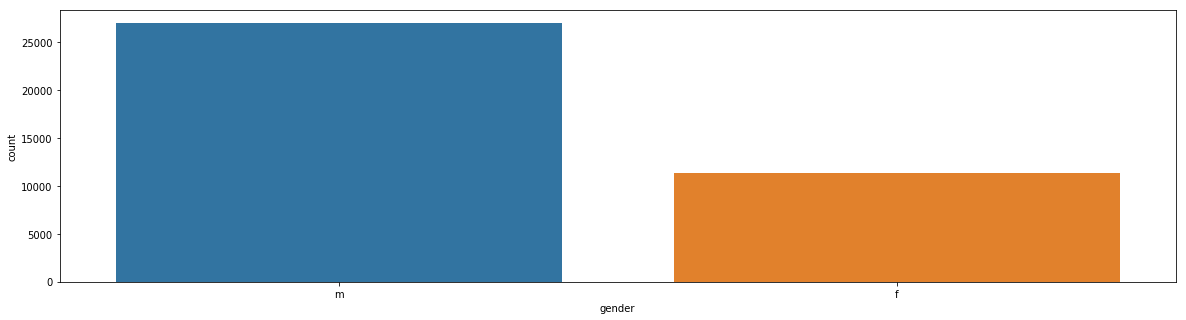

In [45]:
sns.countplot(df_col_merged['gender'], order = df_col_merged['gender'].value_counts().index);


### Observation
no. of males is more than twice the number of females

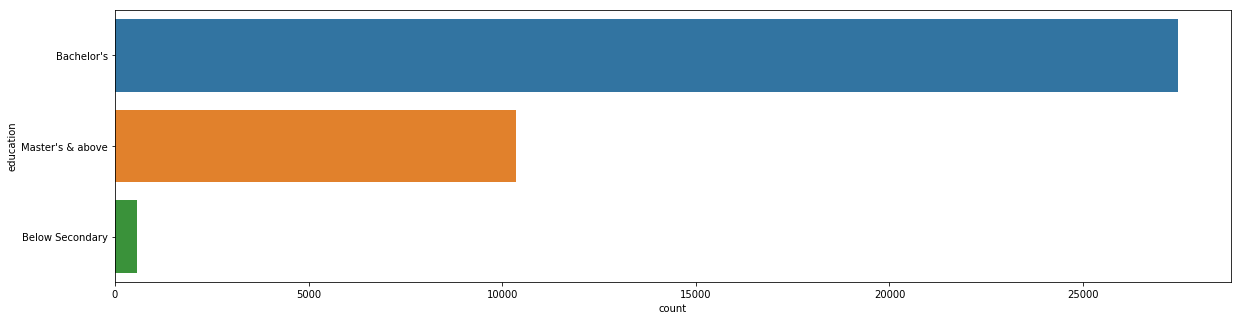

In [46]:
sns.countplot(y =df_col_merged['education'], order = df_col_merged['education'].value_counts().index);


### Observation
Most employees have a bachelor's degree.

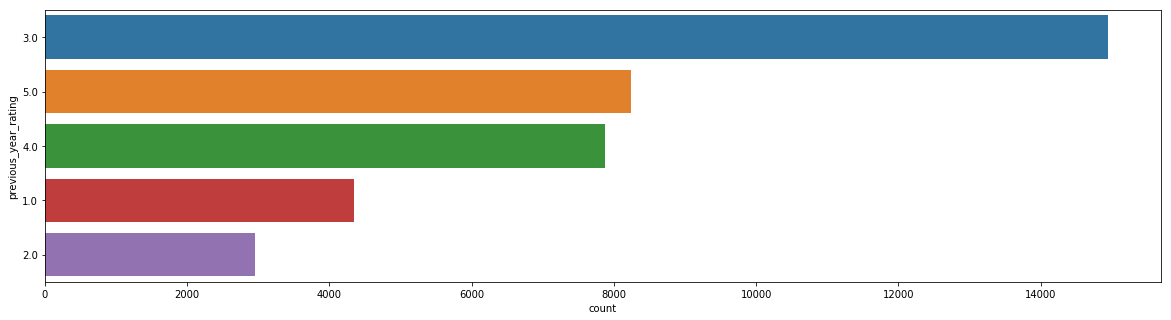

In [47]:
sns.countplot(y =df_col_merged['previous_year_rating'], order = df_col_merged['previous_year_rating'].value_counts().index);

### Observation
Most employees have had a rating of 3.0 in their previous year.

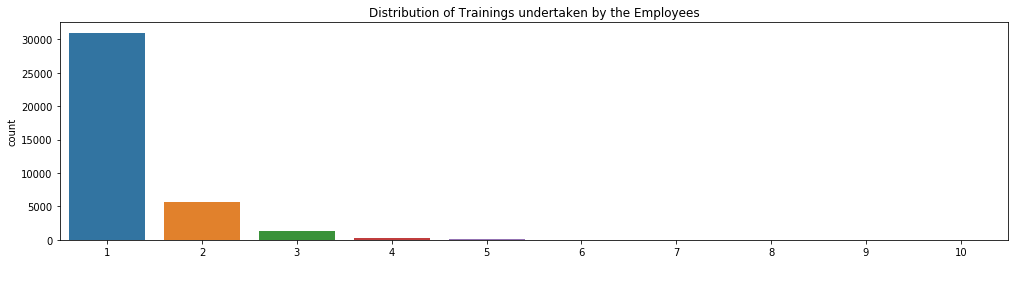

In [48]:
#Distribution of trainings undertaken by the employees
plt.rcParams['figure.figsize'] = (17, 4)
sns.countplot(df_col_merged['no_of_trainings'])
plt.xlabel(' ', fontsize = 14)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()


### Observation
Most employeees have alteast done 1 training.
More that 35,000 employee have only undergone only 1 training.
Less than 10,000 of the employees have undergone more than 1 number trainings.


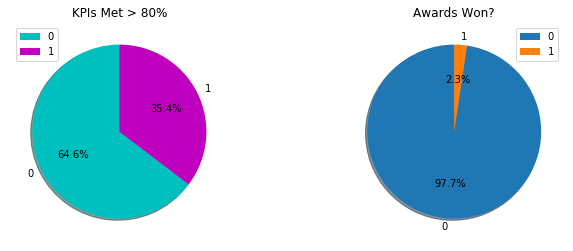

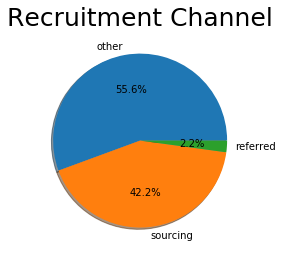

In [49]:
# plotting a pie chart to represent KPIs Met>80 % 
plt.subplot(1, 3, 1)
labels = X_train['KPIs_met >80%'].value_counts().index
colors = ['c','m']
sizes = df_col_merged['KPIs_met >80%'].value_counts()
plt.pie(sizes, labels = labels,colors= colors, shadow = True, startangle = 90,autopct = '%1.1f%%')
plt.title('KPIs Met > 80%')
plt.legend()

# plotting a pie chart to represent Previous year Rating of the Employees
plt.subplot(1, 3, 2)
labels = X_train['awards_won?'].value_counts().index
sizes = df_col_merged['awards_won?'].value_counts() 
plt.pie(sizes, labels = labels, shadow = True, startangle = 90,autopct = '%1.1f%%')
plt.title('Awards Won?')
plt.legend()
plt.show()

plt.subplot(1, 3, 3)
labels = X_train['recruitment_channel'].value_counts().index
sizes = X_train['recruitment_channel'].value_counts()
plt.pie(sizes, labels = labels, shadow = True,autopct = '%1.1f%%')
plt.title('Recruitment Channel', fontsize = 25)

plt.show()

### Observation
35.3% of the employees have met their KPIs requiremnts.
2.3% of the employees have won an award in their previous year.
The company has recruited employees as 42.3% from sourcing and 2.1% from referred chanells.

## 2. Bi-variate & Multi-Variate Analysis

'I have used PairGrid and scatter plot as it allows us to draw a grid of subplots using the same plot type to visualize \ndata using different pair of variable for each subplot and passed hue = is_promoted to vizualize how promotion varies w.r.t \nthe other non-categorical features.\nIt gives an overview of the relationship between 2 different variables in the data and how to do the bivariate analysis on them'

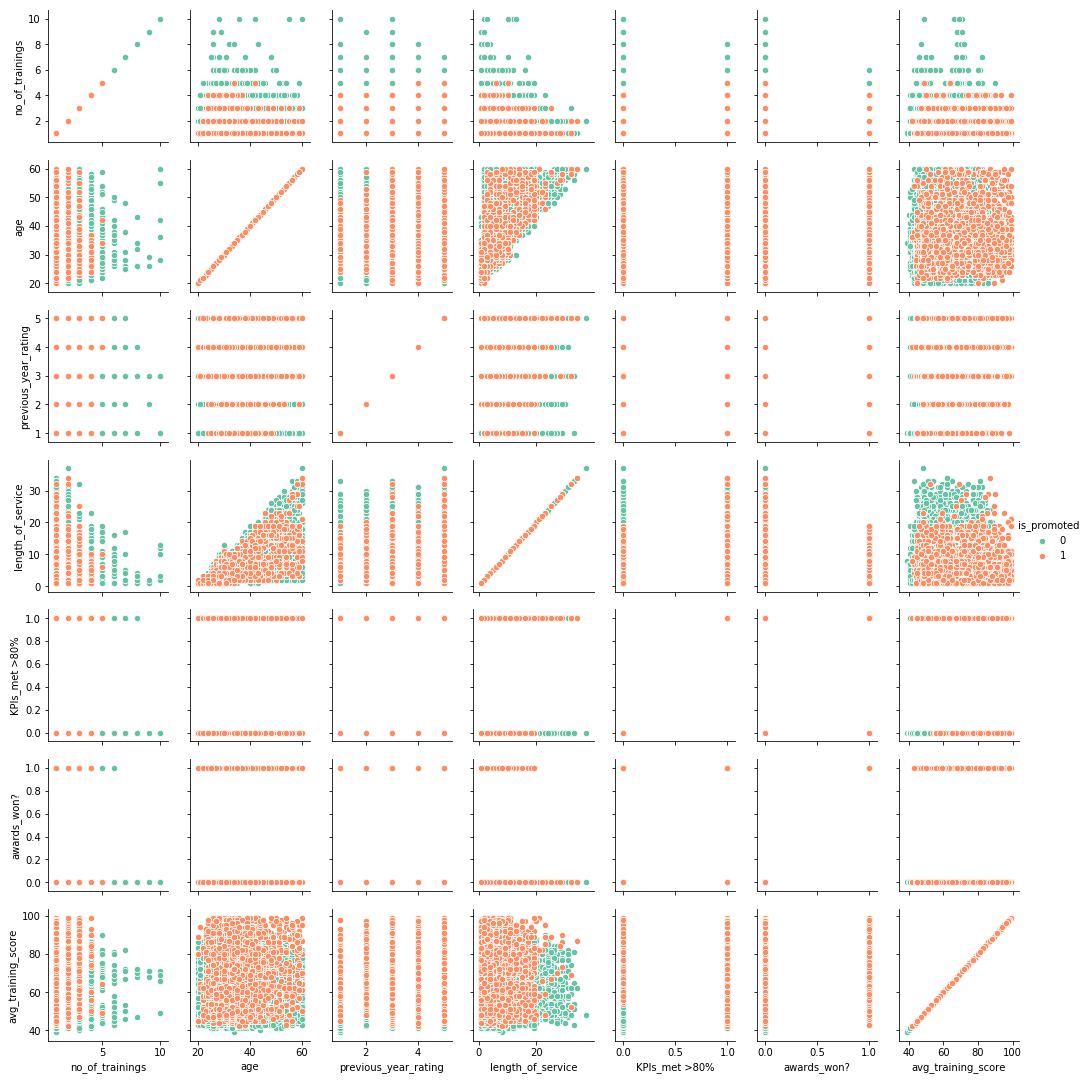

In [50]:
l = sns.PairGrid(df_col_merged, hue="is_promoted", vars=['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service','KPIs_met >80%', 'awards_won?', 'avg_training_score'], palette="Set2")
l = l.map(sns.scatterplot, linewidths=1, edgecolor="w", s=40)
l = l.add_legend()
l.fig.set_size_inches(15,15)

'''I have used PairGrid and scatter plot as it allows us to draw a grid of subplots using the same plot type to visualize 
data using different pair of variable for each subplot and passed hue = is_promoted to vizualize how promotion varies w.r.t 
the other non-categorical features.
It gives an overview of the relationship between 2 different variables in the data and how to do the bivariate analysis on them'''


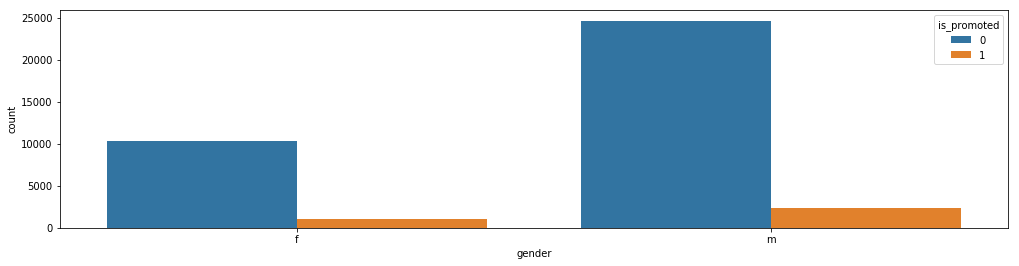

In [51]:
# Total number of people promoted and not promoted on the basis of gender  
sns.countplot(df_col_merged['gender'],hue = df_col_merged['is_promoted'])


### Observation
More male get promotion than female although it could be because there are more than twice as  many male employees than female employees.
###### A better approach would be to find the percentage of promotions w.r.t each variable.

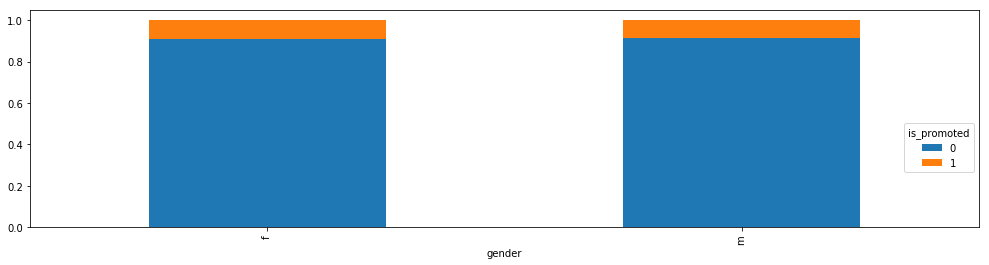

In [52]:
reg = pd.crosstab(df_col_merged.gender,df_col_merged.is_promoted,normalize='index')
reg.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))
 

### Observation
Both male and female Employees have almost the same chance of promotion with the female employees taking a small lead in chance of promotion.

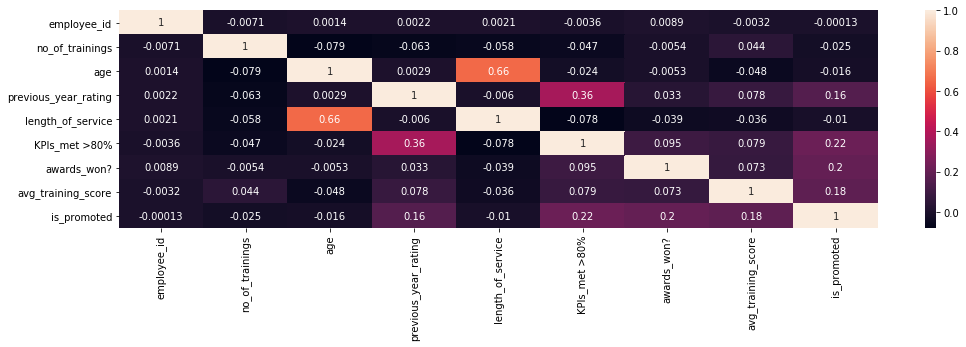

In [53]:
sns.heatmap(df_col_merged.corr(),annot = True)


 ### Observation
 Correlation matrix defining the correlation between target column and the feature set(int/float values column only)
 - Most correlation with target variable is of KPIs_met>80%.  
 - KPIs_met>80%,avg_training_score, previous year rating and awards won are posively correlated to promotion.(Although all of them have very weak positive correalation.)
 - Length of service has very high positive correlation with age(highest in the feature set)
 - KPI_met>80% is postively correlated with previous_year_rating

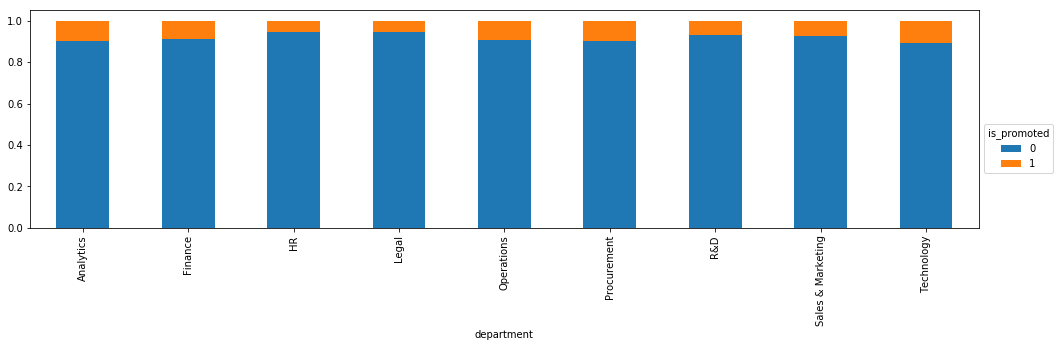

In [54]:
# Percentage of promotions across all the departments

reg = pd.crosstab(df_col_merged.department,df_col_merged.is_promoted,normalize='index')
reg.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))


### Observations

- We can see that employees working in the Technology department have higher chances of being promoted, followed by employees working Procurement Department and Analytics Department.
- Employees woking in the legal Department has least chances of being promoted.



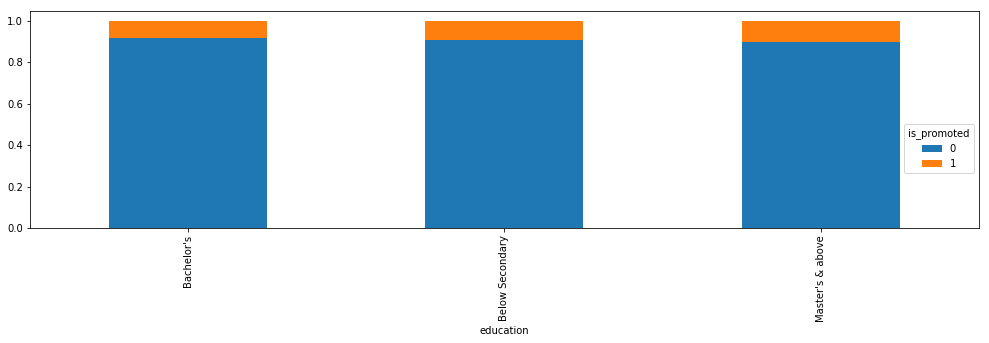

In [55]:
reg = pd.crosstab(df_col_merged.education,df_col_merged.is_promoted,normalize='index')
reg.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))


### Observation
Employees with master's degree and above have the highest chance of promotion followed by Employees with bachelor's degree.

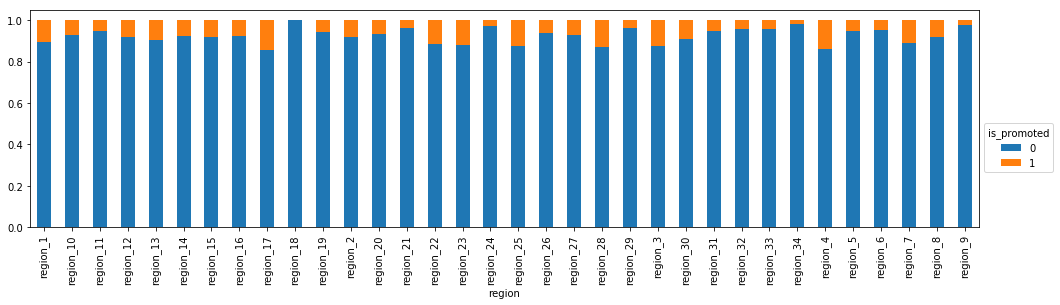

In [56]:
# Percentage of promotions across all the regions

reg = pd.crosstab(df_col_merged.region,df_col_merged.is_promoted,normalize='index')
reg.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))
# Employees from region 4 and 17 have the highest chance of promotion.

### Observation
- Employees from region 4 and 17 have the highest chance of promotion.
- Employees from region 9 have the least chances of getting a promotion.

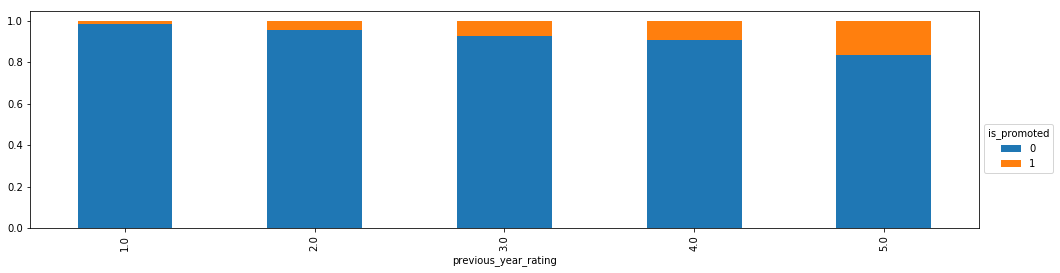

In [57]:
#Difference in the percentage of promoted employees with respect to previous year ratings
rating = pd.crosstab(df_col_merged.previous_year_rating,df_col_merged.is_promoted,normalize='index')
rating.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))


### Observation
The ratio of promoted employees increases with previous year rating.

In [58]:
pd.crosstab(df.recruitment_channel,df.is_promoted,normalize='index')
# Percentage of promotions is higher among the employees who got recruited through referrals.

is_promoted,0,1
recruitment_channel,,
other,0.916048,0.083952
referred,0.879159,0.120841
sourcing,0.914987,0.085013


### Observation
Percentage of promotions is higher among the employees who got recruited through referrals.

In [59]:
pd.crosstab(df['KPIs_met >80%'],df.is_promoted,normalize='index')


is_promoted,0,1
KPIs_met >80%,,
0,0.960413,0.039587
1,0.830906,0.169094


### Observation
Higher percentage of employees got promoted in the group of people whose KPIs_met is greater than 80%.

In [60]:
pd.crosstab(df['awards_won?'],df.is_promoted,normalize='index')


is_promoted,0,1
awards_won?,,
0,0.923251,0.076749
1,0.559843,0.440157


### Observation
Higher percentage of employees got promoted in the group of people who have won one award in their previous years.

In [61]:
# Since the average training score column has a multi modal distributiion,the best way to deal with it is to bin its values and try to understand the distribution using bins.
bins = [30,40,50,60,70,80,90,100]
labels = ['30-40','40-50','50-60','60-70','70-80','80-90','90-100']
df_col_merged['score_binned'] = pd.cut(df_col_merged['avg_training_score'], bins=bins, labels=labels)
df_col_merged['score_binned'].value_counts()

50-60     11200
40-50      8395
60-70      7062
80-90      6062
70-80      5232
90-100      412
30-40         2
Name: score_binned, dtype: int64

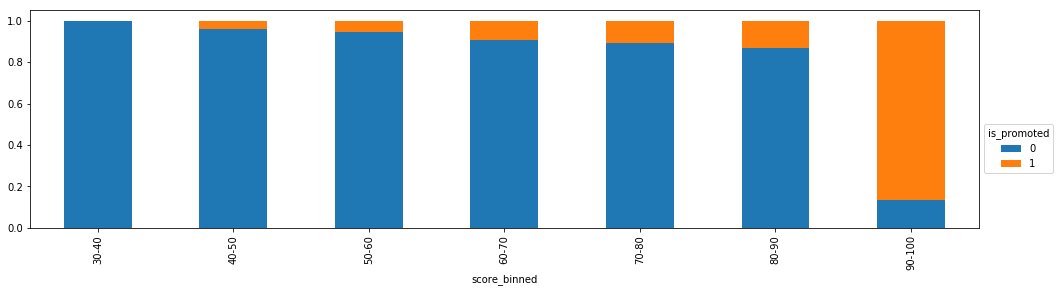

In [62]:
score_bin = pd.crosstab(df_col_merged.score_binned,df_col_merged.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',bbox_to_anchor=(1, 0.5))


### Observation
As the score increases the chancee of Promotions also increases and the ratio is very high in 90-100 range which means getting promoted is highly dependent on the average score.

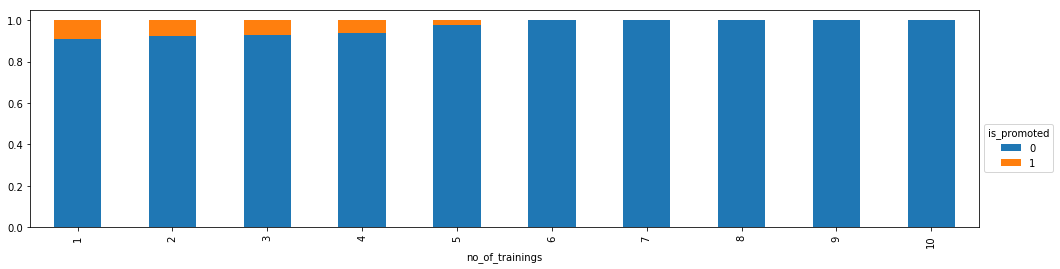

In [63]:
rating = pd.crosstab(df_col_merged.no_of_trainings,df_col_merged.is_promoted,normalize='index')
rating.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

### Observations
Employees who have done more than 6 trainings have no chance of promotion.
Employees who have done 1 training in their previous year have the highest chance of promotion.

In [64]:
pd.crosstab(df_col_merged['awards_won?'], df_col_merged['is_promoted'],normalize='index')


is_promoted,0,1
awards_won?,,
0,0.921769,0.078231
1,0.550612,0.449388


### Observation
There is a higher chance of getting an promotion if the employee has won one award in his/her previous year.

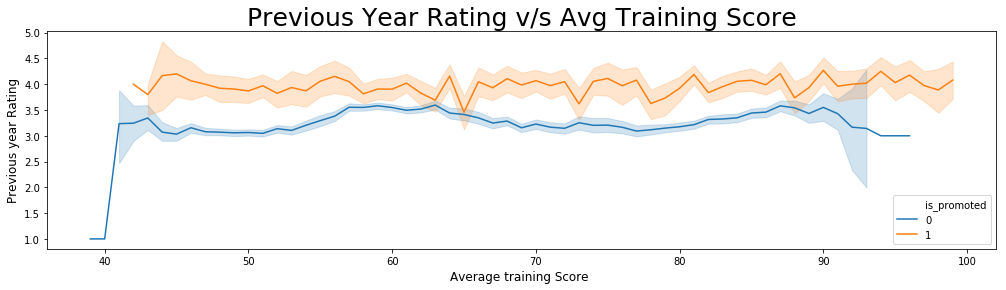

In [65]:
plt.title("Previous Year Rating v/s Avg Training Score",fontsize = 25)
ax = sns.lineplot(x="avg_training_score", y="previous_year_rating", hue="is_promoted",data=df_col_merged)
plt.xlabel('Average training Score ', fontsize = 12)
plt.ylabel('Previous year Rating', fontsize = 12)

plt.show()

### Observation
- Average training score should be more than 40 for being promoted
- People who have average score of above 40 and rating above 3.0 are more likely to get promoted

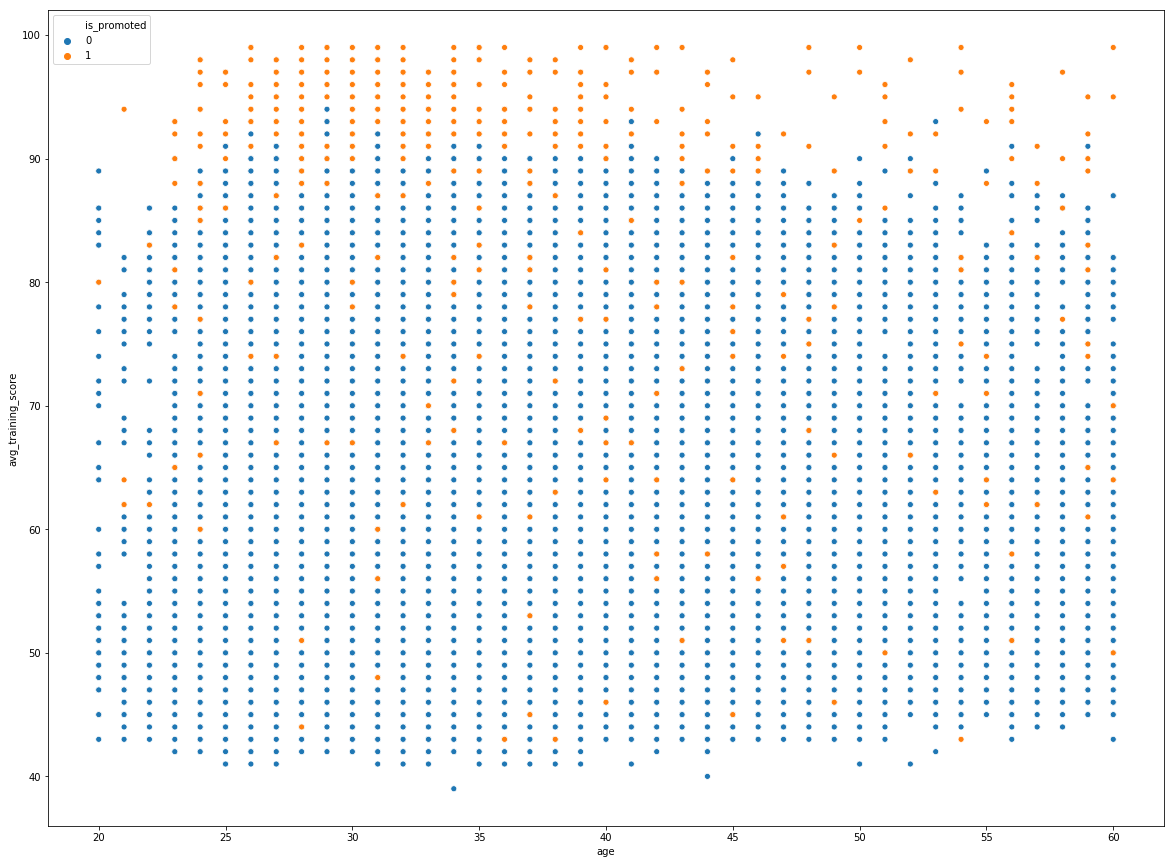

In [66]:
plt.rcParams['figure.figsize'] = (20,15)
sns.scatterplot(x='age',y='avg_training_score',hue='is_promoted',data=df_col_merged)



### Observations
There is no input from age on getting the promotion. It doesn't affect the promotion chances.
This shows that promotions are mainly dependent on the avg_training_score and not on Age as higher the score more the chances of getting the promotions for all age groups.

C:\Users\Well\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


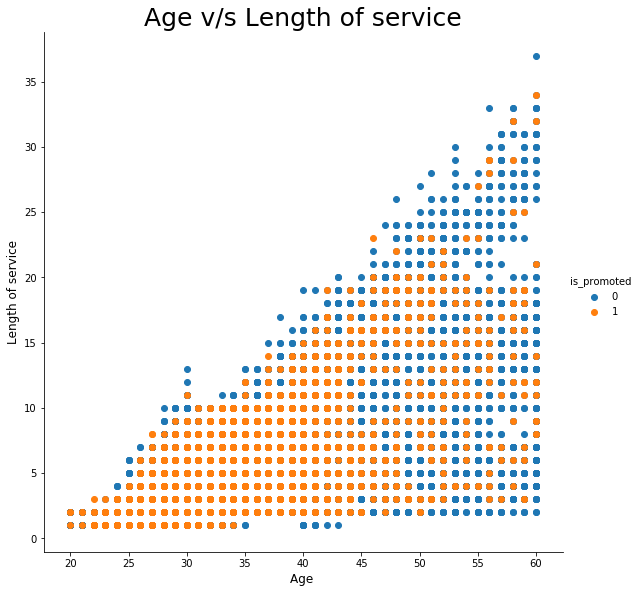

In [67]:
sns.FacetGrid(df_col_merged, hue="is_promoted", size=8).map(plt.scatter, "age", "length_of_service").add_legend()
plt.xlabel('Age ', fontsize = 12)
plt.ylabel('Length of service', fontsize = 12)
plt.title("Age v/s Length of service",fontsize = 25)
plt.show()

### Observation

    Employees with age between 25 to 45 years and lenght of service between 3 to 8 years are more likely to be promoted



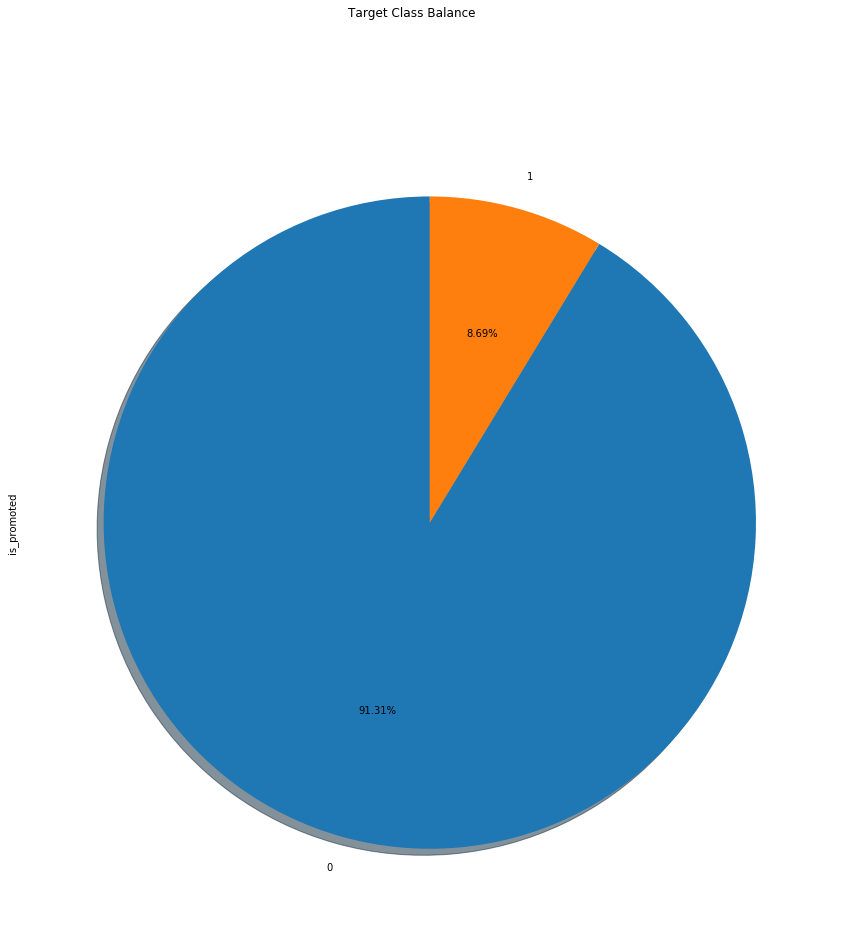

In [68]:
# Target Class Balance

df_col_merged['is_promoted'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', startangle = 90,
                                       labels = df_col_merged['is_promoted'].value_counts().index, shadow = True)
plt.suptitle('Target Class Balance')
plt.show()

### Observation
There is a huge imbalance in target class.So accuracy would not be the correct evaluation metric here. Rather we need to focus on other evalutaion metrics like Precision, Recall and F1 scores.

# Balancing the dataset

In [69]:
# It’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.
# SMOTE-NC is for dataset containing continuous and categorical features.
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42, categorical_features=[1,2,3,4,5])
X_train, Y_train = sm.fit_resample(X_train, Y_train)
X_train.shape,Y_train.shape



'''from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_train, Y_train = cc.fit_resample(X_train, Y_train)
print(sorted(Counter(Y_resampled).items()))





from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train, Y_train = rus.fit_resample(X_train, Y_train)


print(X_train.shape)
print(Y_train.shape)'''

'from imblearn.under_sampling import ClusterCentroids\ncc = ClusterCentroids(random_state=0)\nX_train, Y_train = cc.fit_resample(X_train, Y_train)\nprint(sorted(Counter(Y_resampled).items()))\n\n\n\n\n\nfrom imblearn.under_sampling import RandomUnderSampler\nrus = RandomUnderSampler(random_state=0)\nX_train, Y_train = rus.fit_resample(X_train, Y_train)\n\n\nprint(X_train.shape)\nprint(Y_train.shape)'

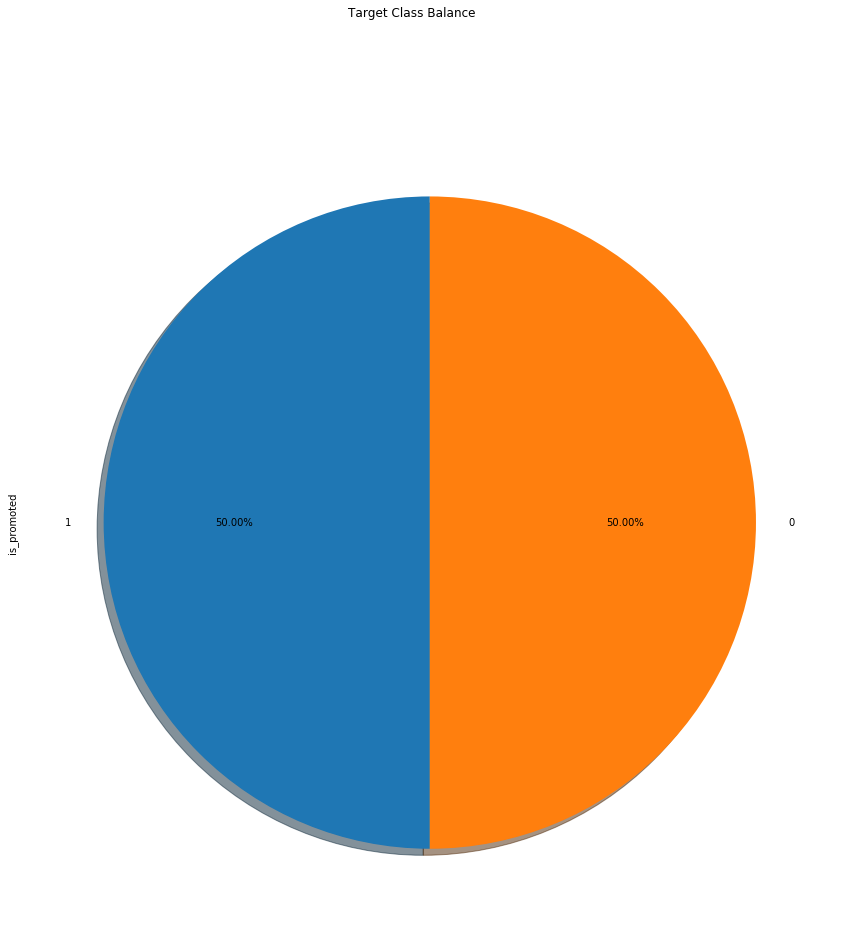

In [70]:
# Target Class Balance

Y_train.value_counts().plot(kind = 'pie', autopct = '%.2f%%', startangle = 90,labels = Y_train.value_counts().index, shadow = True)
plt.suptitle('Target Class Balance')
plt.show()

#### Target class is balanced now for the train data.

# Feature Egineering

In [71]:
# As shown in the EDA, employees who have done more than 6 trainings have no chance of promotion. So we are creating a feature where employees with more than 6 trainings get 0 and 1 otherwise.
X_train["no_of_trainings_promoted"] = X_train["no_of_trainings"].apply(lambda x: 0 if x in [7, 8, 9, 10] else 1)
X_val["no_of_trainings_promoted"] = X_val["no_of_trainings"].apply(lambda x: 0 if x in [7, 8, 9, 10] else 1)
X_test["no_of_trainings_promoted"] = X_test["no_of_trainings"].apply(lambda x: 0 if x in [7, 8, 9, 10] else 1)
df_test["no_of_trainings_promoted"] = df_test["no_of_trainings"].apply(lambda x: 0 if x in [7, 8, 9, 10] else 1)

In [72]:
### Grouping age into 4 different bins(since its a continuous variable)
def binAge(x):
    
    if (x<=26):
        age= 1
    elif (x>26 and x<=35):
        age= 2   
    elif (x>35 and x<=50):
        age= 3
    else:
        age= 4
    return age

X_train['age_bin']=X_train['age'].apply(binAge)             
X_test['age_bin']=X_test['age'].apply(binAge)
X_val['age_bin']=X_val['age'].apply(binAge)
df_test['age_bin']=df_test['age'].apply(binAge)
X_train['age_bin'].value_counts()

2    40125
3    22054
1     5390
4     2491
Name: age_bin, dtype: int64

In [73]:
# Trying Logarithmic transformation on the continuous variable age
X_train["age_log"] = np.log(X_train["age"])
X_val["age_log"] = np.log(X_val["age"])
X_test["age_log"] = np.log(X_test["age"])
df_test["age_log"] = np.log(df_test["age"])

# Trying Logarithmic transformation on the continuous variable length of service
X_train['length_of_service_log'] = np.log(X_train['length_of_service'])
X_val['length_of_service_log'] = np.log(X_val['length_of_service'])
X_test['length_of_service_log'] = np.log(X_test['length_of_service'])
df_test['length_of_service_log'] = np.log(df_test['length_of_service'])

# Trying Logarithmic transformation on the continuous variable length of service
X_train["avg_training_score_log"] = np.log(X_train["avg_training_score"])
X_test["avg_training_score_log"] = np.log(X_test["avg_training_score"])
X_val["avg_training_score_log"] = np.log(X_val["avg_training_score"])
df_test["avg_training_score_log"] = np.log(df_test["avg_training_score"])

In [74]:
# LABLE ENCODING FOR THE GENDER COLUMN - So that it can be used in model training
gender_mapping = {'m': 1, 'f': 0} 
X_train['gender']= X_train['gender'].map(gender_mapping) 
X_test['gender']= X_test['gender'].map(gender_mapping)  
X_val['gender']= X_val['gender'].map(gender_mapping) 
df_test['gender']= df_test['gender'].map(gender_mapping) 

In [75]:
# Since the average training score column has a multi modal distributiion, the best way to deal with it is to bin its values and encode them.
bins = [30,40,50,60,70,80,90,100]
labels = ['30-40','40-50','50-60','60-70','70-80','80-90','90-100']
X_train['score_binned'] = pd.cut(X_train['avg_training_score'], bins=bins, labels=labels)
X_val['score_binned'] = pd.cut(X_val['avg_training_score'], bins=bins, labels=labels)
X_test['score_binned'] = pd.cut(X_test['avg_training_score'], bins=bins, labels=labels)
df_test['score_binned'] = pd.cut(df_test['avg_training_score'], bins=bins, labels=labels)

def binScore(x):
    
    if (x=='30-40'):
        score= 1
    elif (x=='40-50'):
        score= 2   
    elif (x=='50-60'):
        score= 3
    elif (x=='60-70'):
        score= 4  
    elif (x=='70-80'):
        score= 5
    elif (x=='80-90'):
        score= 6   
    elif (x=='90-100'):
        score= 7
        
    return score

X_train['score_binned']=X_train['score_binned'].apply(binScore)             
X_test['score_binned']=X_test['score_binned'].apply(binScore)
X_val['score_binned']=X_val['score_binned'].apply(binScore)
df_test['score_binned']=df_test['score_binned'].apply(binScore)

In [76]:
# As we saw during EDA, Employees whose avg_training_score is more 90 have very high chances of promotion. We are making a feeature by endcoding binary values in it. 1 for avg_training_score more than 90 and 0 otherwise.
X_train["avg_training_score_promoted"] = X_train["avg_training_score"].apply(lambda x: 1 if x>=90 else 0)
X_test["avg_training_score_promoted"] = X_test["avg_training_score"].apply(lambda x: 1 if x>=90 else 0)
X_val["avg_training_score_promoted"] = X_val["avg_training_score"].apply(lambda x: 1 if x>=90 else 0)
df_test["avg_training_score_promoted"] = df_test["avg_training_score"].apply(lambda x: 1 if x>=90 else 0)

In [77]:
# Since there are so many region lables. We need to bin these lables into certain categories.
# Grouping regions into categories
def bin_region(row):
    if row['region'] >= 1 and row['region'] <= 10:
        return '1to10'
    elif row['region'] >= 11 and row['region'] <= 20:
        return '11to20'
    elif row['region'] >= 21 and row['region'] <= 30:
        return '21to30'
    elif row['region'] >= 31 and row['region'] <= 40:
        return '31to40'
    
# Region is a mixed variable. Every label is preceded with region_. We can remove that part and keep only the numeraical part for binning.     
#Extracting only numbers from the labels
X_train['region']=X_train['region'].str.split("_").str[1].astype('int64') # .split("_") returns a list splitted on the delimeter specified(_) and then we choose the 2nd value([1]) in the list as it is the numerical value.
                                                                         # We also convert that string type numerical value to int type. 
X_test['region']=X_test['region'].str.split("_").str[1].astype('int64')
X_val['region']=X_val['region'].str.split("_").str[1].astype('int64')
df_test['region']=df_test['region'].str.split("_").str[1].astype('int64')


X_train['region'] = X_train.apply(lambda row: bin_region(row), axis=1)
X_test['region'] = X_test.apply(lambda row: bin_region(row), axis=1)
X_val['region'] = X_val.apply(lambda row: bin_region(row), axis=1)
df_test['region'] = df_test.apply(lambda row: bin_region(row), axis=1)


In [78]:
# Higher percentage of people have got promotion when they have KPIs_met > 80% ==1 and Awards_won ==1 as seen in the EDA done above.
# Making a feature from it by giving value 1 in those observations where both of the conditions satisfy, otherwise 0. 

X_train["K&A"] = np.where(((X_train["KPIs_met >80%"]==1) & (X_train["awards_won?"]==1)),1,0)
X_test["K&A"] = np.where(((X_test["KPIs_met >80%"]==1) & (X_test["awards_won?"]==1)),1,0)
X_val["K&A"] = np.where(((X_val["KPIs_met >80%"]==1) & (X_val["awards_won?"]==1)),1,0)
df_test["K&A"] = np.where(((df_test["KPIs_met >80%"]==1) & (df_test["awards_won?"]==1)),1,0)

In [79]:
# We can find an estimate of the total score obtained my multiplying the no. of trainings done and the avg_training_score and then bringing it scale by dividing it by 10 
X_train["sum_score_scale"]=(X_train["no_of_trainings"]*X_train["avg_training_score"])/10
X_test["sum_score_scale"]=(X_test["no_of_trainings"]*X_test["avg_training_score"])/10
X_val["sum_score_scale"]=(X_val["no_of_trainings"]*X_val["avg_training_score"])/10
df_test["sum_score_scale"]=(df_test["no_of_trainings"]*df_test["avg_training_score"])/10

In [80]:
# Couldn't find a variable whose where the frequency is related somewhat with the target variable,
'''
### FREQUENCY ENCODING
# size of each category
encoding = X_train.groupby(['region']).size()
# Get frequency of each category
encoding = encoding/len(X_train)
X_train['enc_r'] = X_train.region.map(encoding)
X_test['enc_r'] = X_test.region.map(encoding)
X_val['enc_r'] = X_val.region.map(encoding)
df_test['enc_r'] = df_test.region.map(encoding)'''

"\n### FREQUENCY ENCODING\n# size of each category\nencoding = X_train.groupby(['region']).size()\n# Get frequency of each category\nencoding = encoding/len(X_train)\nX_train['enc_r'] = X_train.region.map(encoding)\nX_test['enc_r'] = X_test.region.map(encoding)\nX_val['enc_r'] = X_val.region.map(encoding)\ndf_test['enc_r'] = df_test.region.map(encoding)"

In [81]:
#ENCODING Education VALUES
#Creating a dictionary to change the value in education(as seen in the eda that higher education means better chances of promotion so I gave the encodings in that order)
edd_dict = {"Bachelor's": 1,"Master's & above": 2,"Below Secondary":0}
X_train['education'] = X_train['education'].map(edd_dict) 
X_test['education'] = X_test['education'].map(edd_dict)
X_val['education'] = X_val['education'].map(edd_dict)
df_test['education'] = df_test['education'].map(edd_dict)

In [82]:
# Target encoding the Department values
import category_encoders as ce
target_enc = ce.TargetEncoder(cols='region')
target_enc.fit(X_train['region'], Y_train)
# We will be doing the target encoding only on the train set and then using those values for the other sets. This will prevent overfitting.

TargetEncoder(cols=['region'])

In [83]:
# Transform the features, rename columns with _cb suffix, and join to dataframe
X_train = X_train.join(target_enc.transform(X_train['region']).add_suffix('_cb'))

X_train['region_cb'].value_counts()

0.540052    31921
0.526051    21669
0.414277    13322
0.277319     3148
Name: region_cb, dtype: int64

In [84]:
X_train['region'].value_counts()

1to10     31921
21to30    21669
11to20    13322
31to40     3148
Name: region, dtype: int64

In [85]:
def regiontc(x):
    if (x=="1to10"):
        det=0.542564
    elif (x=="11to20"):
        det=0.413990
    elif (x=="21to30"):
        det=0.521846
    elif (x=="31to40"):
        det=0.284606
   

    
    return det

In [86]:
X_val['region_cb'] = X_val['region'].apply(regiontc)
X_test['region_cb'] = X_test['region'].apply(regiontc)
df_test['region_cb'] = df_test['region'].apply(regiontc)

In [87]:
# Employees who have KPIs_met >80%==1 and a good previous year rating have greater chances of getting the promotion
X_train['kpi*rating'] = X_train['KPIs_met >80%'] * X_train['previous_year_rating']

In [88]:
X_val['kpi*rating'] = X_val['KPIs_met >80%'] * X_val['previous_year_rating']
X_test['kpi*rating'] = X_test['KPIs_met >80%'] * X_test['previous_year_rating']
df_test['kpi*rating'] = df_test['KPIs_met >80%'] * df_test['previous_year_rating']

In [89]:
#Since these three columns affect the target columns, I tried to make an linear feature using the combination of these.
X_train['all_score'] =X_train['previous_year_rating']*X_train['KPIs_met >80%'] + X_train['previous_year_rating']*X_train['awards_won?']
X_val['all_score'] =X_val['previous_year_rating']*X_val['KPIs_met >80%'] + X_val['previous_year_rating']*X_val['awards_won?']
df_test['all_score'] =df_test['previous_year_rating']*df_test['KPIs_met >80%'] + df_test['previous_year_rating']*df_test['awards_won?']
X_test['all_score'] =X_test['previous_year_rating']*X_test['KPIs_met >80%'] +X_test['previous_year_rating']*X_test['awards_won?']



In [90]:
# Getting Dummy varaible for the categorical column so, that they can be used in the training process.
X_train=pd.get_dummies(X_train, columns=["department","education"], prefix=["Dept", "Education"])
X_val=pd.get_dummies(X_val, columns=["department","education"], prefix=["Dept", "Education"])
X_test=pd.get_dummies(X_test, columns=["department","education"], prefix=["Dept", "Education"])
df_test=pd.get_dummies(df_test, columns=["department","education"], prefix=["Dept", "Education"])


# Feature Selection

In [91]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_val.shape)
print(Y_val.shape)
print(df_test.shape)

(70060, 35)
(70060,)
(4111, 35)
(4111,)
(12332, 35)
(12332,)
(23490, 35)


In [92]:
X_train.dtypes

employee_id                       int64
region                           object
gender                            int64
recruitment_channel              object
no_of_trainings                   int64
age                               int64
previous_year_rating            float64
length_of_service                 int64
KPIs_met >80%                     int64
awards_won?                       int64
avg_training_score                int64
no_of_trainings_promoted          int64
age_bin                           int64
age_log                         float64
length_of_service_log           float64
avg_training_score_log          float64
score_binned                   category
avg_training_score_promoted       int64
K&A                               int32
sum_score_scale                 float64
region_cb                       float64
kpi*rating                      float64
all_score                       float64
Dept_Analytics                    uint8
Dept_Finance                      uint8


In [93]:
# Converting to Int
X_train['score_binned'] = X_train['score_binned'].astype('int')
X_val['score_binned'] = X_val['score_binned'].astype('int')
X_test['score_binned'] = X_test['score_binned'].astype('int')
df_test['score_binned'] = df_test['score_binned'].astype('int')

In [94]:
# Dropping categorical columns.
X_train = X_train.drop(['recruitment_channel'],axis = 1)
X_val = X_val.drop(['recruitment_channel'],axis = 1)
X_test = X_test.drop(['recruitment_channel'],axis = 1)
df_test = df_test.drop(['recruitment_channel'],axis = 1)

In [95]:
X_train = X_train.drop(['region'],axis = 1)
X_val = X_val.drop(['region'],axis = 1)
X_test = X_test.drop(['region'],axis = 1)
df_test = df_test.drop(['region'],axis = 1)

In [96]:
X_train.dtypes

employee_id                      int64
gender                           int64
no_of_trainings                  int64
age                              int64
previous_year_rating           float64
length_of_service                int64
KPIs_met >80%                    int64
awards_won?                      int64
avg_training_score               int64
no_of_trainings_promoted         int64
age_bin                          int64
age_log                        float64
length_of_service_log          float64
avg_training_score_log         float64
score_binned                     int32
avg_training_score_promoted      int64
K&A                              int32
sum_score_scale                float64
region_cb                      float64
kpi*rating                     float64
all_score                      float64
Dept_Analytics                   uint8
Dept_Finance                     uint8
Dept_HR                          uint8
Dept_Legal                       uint8
Dept_Operations          

In [97]:
# TO REMOVE CONSTANT FEATURES
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)  # fit finds the features with zero variance
#we can print the constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

0


[]

In [98]:
#TO REMOVE QUASI-CONSTANT FEATURES
sel = VarianceThreshold(
    threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train)  # fit finds the features with low variance
# finally we can print the quasi-constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

3


['no_of_trainings_promoted', 'region_cb', 'Education_0']

In [99]:
### bAADMEH Features change kardena
X_train = X_train.drop(['no_of_trainings_promoted', 'region_cb','Education_0'],axis= 1)
X_test = X_test.drop(['no_of_trainings_promoted', 'region_cb','Education_0'],axis= 1)
X_val = X_val.drop(['no_of_trainings_promoted',  'region_cb','Education_0'],axis= 1)
df_test = df_test.drop(['no_of_trainings_promoted',  'region_cb','Education_0'],axis= 1)

In [100]:
#CORRELATION MATRIX
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any other insight.

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [101]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

9

In [102]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)
df_test.drop(labels=corr_features, axis=1, inplace=True)
X_val.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((70060, 21), (4111, 21))

In [103]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [104]:
'''# step forward feature selection
# I indicate that I want to select 6 features from
# the total, and that I want to select those features
# based on the optimal neg_mean_squared_error

sfs1 = SFS(RandomForestClassifier(n_jobs=4),  #Number of jobs to run in parallel.-1 means using all processors.
           k_features=22,  #Number of Features to be selected.
           forward=True, 
           floating=False, 
           verbose=2,  #the higher, the more messages
           scoring='f1', 
           cv=5)


sfs1 = sfs1.fit(np.array(X_train.fillna(0)), Y_train)'''
# I will be using all the features I have made for training the model. As I feel the features that are left after the filter methods can help the model learn better.

"# step forward feature selection\n# I indicate that I want to select 6 features from\n# the total, and that I want to select those features\n# based on the optimal neg_mean_squared_error\n\nsfs1 = SFS(RandomForestClassifier(n_jobs=4),  #Number of jobs to run in parallel.-1 means using all processors.\n           k_features=22,  #Number of Features to be selected.\n           forward=True, \n           floating=False, \n           verbose=2,  #the higher, the more messages\n           scoring='f1', \n           cv=5)\n\n\nsfs1 = sfs1.fit(np.array(X_train.fillna(0)), Y_train)"

In [105]:
'''selected_feat= list(sfs1.k_feature_idx_)
print(selected_feat)
#X_train.columns'''

'selected_feat= list(sfs1.k_feature_idx_)\nprint(selected_feat)\n#X_train.columns'

In [106]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_val.shape)
print(Y_val.shape)
print(df_test.shape)

(70060, 21)
(70060,)
(4111, 21)
(4111,)
(12332, 21)
(12332,)
(23490, 21)


In [107]:
from sklearn.preprocessing import StandardScaler
# Standardising all the colums. Since it helps the model to train on the data better.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val= sc.transform(X_val)
X_test = sc.transform(X_test)
df_test = sc.transform(df_test)
print("Shape of the x :", X_train.shape)
print("Shape of the y :", Y_train.shape)

Shape of the x : (70060, 21)
Shape of the y : (70060,)


# Hyperparameter Tuning

In [108]:
'''#Grid Search To Tune The HyperParameters 
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True], #some samples will be used multiple times in a single tree
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}   #No.of trees 

grid_search = GridSearchCV(estimator = rc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, Y_train)
grid_search.best_params_'''

"#Grid Search To Tune The HyperParameters \nfrom sklearn.ensemble import RandomForestClassifier\nrc = RandomForestClassifier()\nfrom sklearn.model_selection import GridSearchCV\nparam_grid = {\n    'bootstrap': [True], #some samples will be used multiple times in a single tree\n    'max_depth': [80, 90, 100, 110],\n    'max_features': [2, 3],\n    'min_samples_leaf': [3, 4, 5],\n    'min_samples_split': [8, 10, 12],\n    'n_estimators': [100, 200, 300, 1000]}   #No.of trees \n\ngrid_search = GridSearchCV(estimator = rc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)\ngrid_search.fit(X_train, Y_train)\ngrid_search.best_params_"

 # Modeling

## Random Forest Classifier Model

In [109]:
from sklearn.model_selection import train_test_split
#Using Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(n_estimators = 100, bootstrap= True,
 max_depth= 110,
 max_features= 3,
 min_samples_leaf= 5,
 min_samples_split= 8,
 random_state = 30,
 class_weight = 'balanced')
rc.fit(X_train, Y_train)


RandomForestClassifier(class_weight='balanced', max_depth=110, max_features=3,
                       min_samples_leaf=5, min_samples_split=8,
                       random_state=30)

In [110]:
#predicting the outcomes on val set
predictions = rc.predict(X_val)

In [111]:
from sklearn.metrics import classification_report
print(classification_report(Y_val,predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11336
           1       0.50      0.38      0.44       996

    accuracy                           0.92     12332
   macro avg       0.73      0.68      0.70     12332
weighted avg       0.91      0.92      0.91     12332



In [112]:
#predicting the outcomes on test set
predictions = rc.predict(X_test)
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3774
           1       0.51      0.41      0.46       337

    accuracy                           0.92      4111
   macro avg       0.73      0.69      0.71      4111
weighted avg       0.91      0.92      0.92      4111



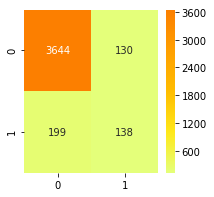

In [113]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, predictions)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

## GradientBoost Classifier Model

In [114]:
#Using GradientBoost 

#Grid Search To Tune The HyperParameters 
'''
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [8, 9, 10, 11],
    'max_features': [1.0,2.0, 3.0],
    'learning_rate': [0.01,0.05,0.1]
    'min_samples_leaf': [60, 75, 90],
    'n_estimators': [100, 300,600, 800, 1000]}   #No.of trees 
gc = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator =gc , param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, Y_train)
grid_search.best_params_'''

from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
params =  {'learning_rate': 0.05, 'max_depth': 8, 'max_features': 1.0, 'min_samples_leaf': 75, 'n_estimators': 600}
model = GradientBoostingClassifier(**params)
model.fit(X_train,Y_train)
dy_predicted = model.predict(X_val)
f1_score(Y_val,dy_predicted,zero_division =1)
print(classification_report(Y_val,dy_predicted))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     11336
           1       0.62      0.39      0.47       996

    accuracy                           0.93     12332
   macro avg       0.78      0.68      0.72     12332
weighted avg       0.92      0.93      0.92     12332



In [115]:
#predicting the outcomes on test set
dy_predicted = model.predict(X_test)
print(classification_report(Y_test,dy_predicted))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3774
           1       0.61      0.42      0.50       337

    accuracy                           0.93      4111
   macro avg       0.78      0.70      0.73      4111
weighted avg       0.92      0.93      0.92      4111



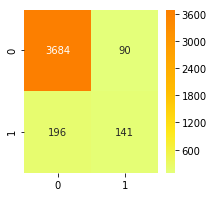

In [116]:
cm = confusion_matrix(Y_test, dy_predicted)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

## XGBClassifier Model

In [117]:
import xgboost as xgb

'''Tuning hyperparameter
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=29
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 20),
    'learning_rate': [0.1, 0.01, 0.05],
    'min_child_weight'=[7,8,9,10]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'f1_score',
    n_jobs = -1,
    cv = 3,
    verbose=True
)

'''



###Train the model with the best params
clf = xgb.XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=4, min_child_weight=7, nthread=4, objective= 'binary:logistic',scale_pos_weight=1,seed=29)
clf.fit(X_train, Y_train)
pred = clf.predict(X_val)
f1_score(Y_val, pred)


0.4755062050947093

In [118]:
#predicting the outcomes on val set
print(classification_report(Y_val,pred))


              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11336
           1       0.68      0.37      0.48       996

    accuracy                           0.93     12332
   macro avg       0.81      0.68      0.72     12332
weighted avg       0.92      0.93      0.93     12332



In [119]:
#predicting the outcomes on test set
pred = clf.predict(X_test)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3774
           1       0.67      0.38      0.48       337

    accuracy                           0.93      4111
   macro avg       0.81      0.68      0.72      4111
weighted avg       0.92      0.93      0.93      4111



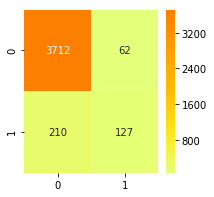

In [120]:
cm = confusion_matrix(Y_test, pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

## LightGBM model

In [121]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_val)
f1_score(Y_val,y_pred)
print(classification_report(Y_val,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11336
           1       0.69      0.37      0.48       996

    accuracy                           0.94     12332
   macro avg       0.82      0.68      0.72     12332
weighted avg       0.93      0.94      0.93     12332



In [122]:
y_pred=clf.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3774
           1       0.66      0.41      0.50       337

    accuracy                           0.93      4111
   macro avg       0.80      0.70      0.73      4111
weighted avg       0.93      0.93      0.93      4111



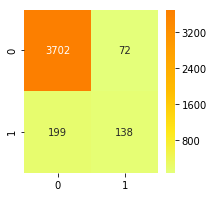

In [123]:
cm = confusion_matrix(Y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

### Best model based on F1 score, Recall and precision is the Gradient Boosting Model

#### Finding the labels for the Test set given using Gradient Boosting Model

In [126]:
'''params =  {'learning_rate': 0.05, 'max_depth': 8, 'max_features': 1.0, 'min_samples_leaf': 75, 'n_estimators': 600}
model = GradientBoostingClassifier(**params)
model.fit(X_train,Y_train)
dy_predicted = model.predict(df_test)'''


'''# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, Y_train)
y_pred=clf.predict(df_test)'''
from sklearn.model_selection import GridSearchCV
model = lgb.LGBMClassifier( 
    boosting_type="gbdt",
    is_unbalance=True, 
    random_state=10, 
    n_estimators=50,
    num_leaves=30, 
    max_depth=8,
    feature_fraction=0.5,  
    bagging_fraction=0.8, 
    bagging_freq=15, 
    learning_rate=0.01,    
)

params_opt = {'n_estimators':range(200, 600, 80), 'num_leaves':range(20,60,10)}
gridSearchCV = GridSearchCV(estimator = model, 
    param_grid = params_opt, 
    scoring='f1',
    n_jobs=4,
    iid=False, 
    verbose=1,
    cv=3)
gridSearchCV.fit(X_train,Y_train)

gridSearchCV.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   50.8s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  1.4min finished


{'n_estimators': 520, 'num_leaves': 50}

In [127]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(n_estimators= 520,num_leaves= 50)
clf.fit(X_train, Y_train)
y_pred=clf.predict(df_test)

In [128]:
Predicted_Values = list(y_pred)

In [129]:
Predicted_Values

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [130]:
df_test = pd.read_csv("test_2umaH9m.csv")

In [131]:
submission = pd.DataFrame()

In [132]:
submission['employee_id'] = df_test['employee_id']
submission['is_promoted'] = Predicted_Values


In [133]:
submission.head()


,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [134]:
submission.set_index('employee_id',inplace=True)

In [135]:
submission.to_csv('Submisson.csv')